In [1]:
import sys
sys.path.insert(0, '../Data')

from fmp_module import *
%matplotlib inline

In [2]:
CHORD_LABELS = libfmp.c5.get_chord_labels(nonchord=False)

# Techniques for decomposition
V_STFT = 'STFT'
V_IIR = 'IIR'
V_CQT = 'CQT'

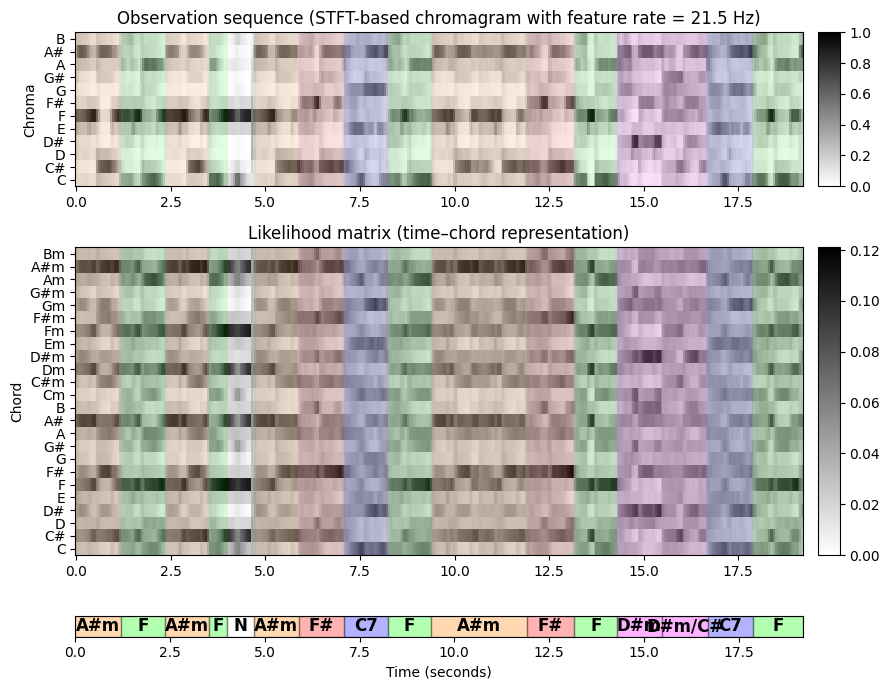

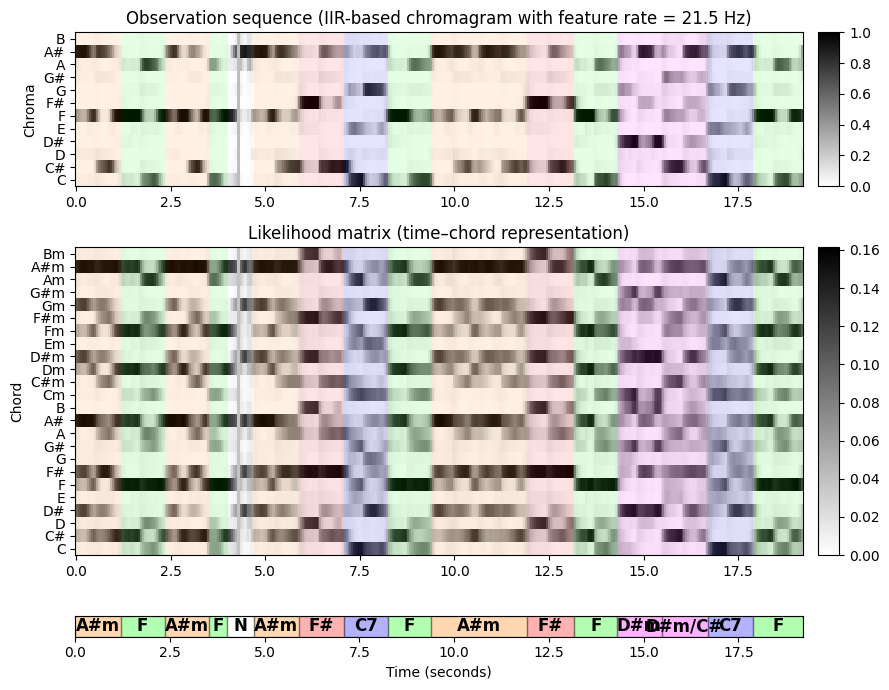

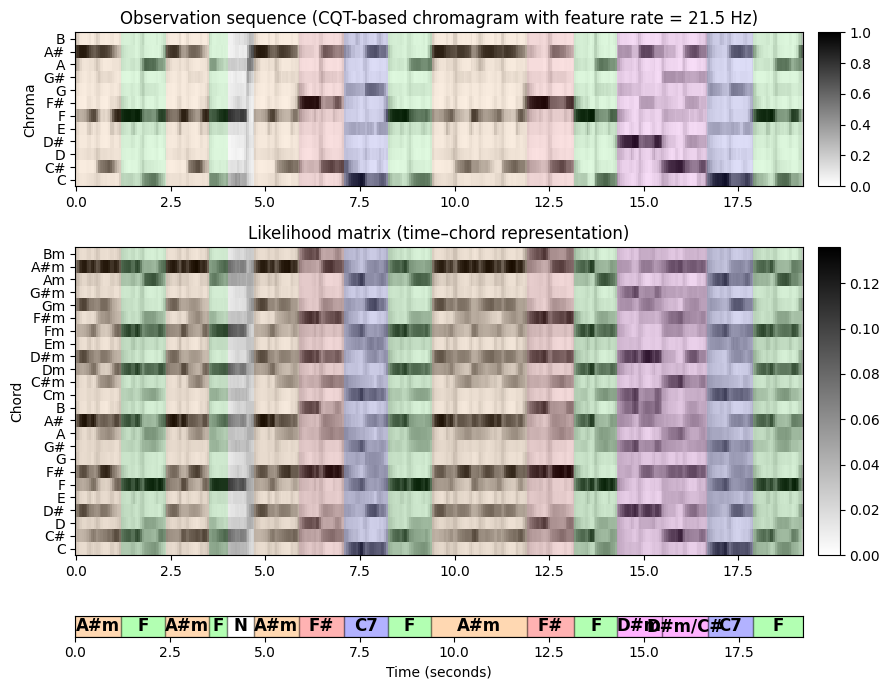

In [8]:
fn_wav = '../Data/Carol Pita - Um Cafune E Um Violao - p1.wav'
fn_ann = '../Data/cafune_labels_p1.csv'
color_ann = {'N': [1, 1, 1, 1], 'A#m': [1, 0.5, 0, 1], 'F': [0, 1, 0, 1], 
             'F#': [1, 0, 0, 1], 'C7': [0, 0, 1, 1], 'D#m': [1, 0, 1, 0], 
             'D#m/C#': [1, 0, 1, 0]}

plot_hmm_likelihood_matrix(fn_wav, fn_ann, color_ann, CHORD_LABELS, version=V_STFT)
plot_hmm_likelihood_matrix(fn_wav, fn_ann, color_ann, CHORD_LABELS, version=V_IIR)
plot_hmm_likelihood_matrix(fn_wav, fn_ann, color_ann, CHORD_LABELS, version=V_CQT)

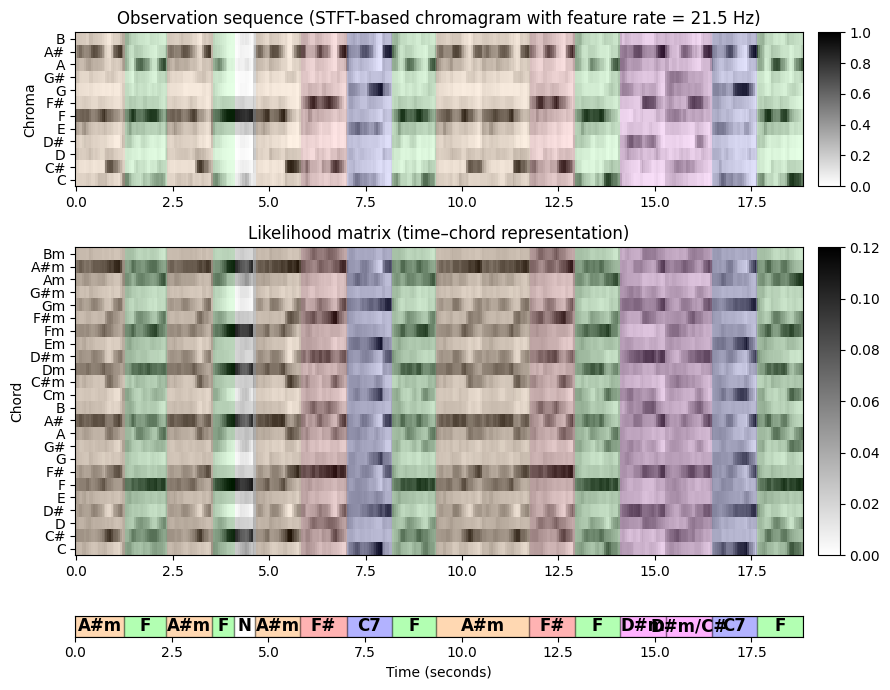

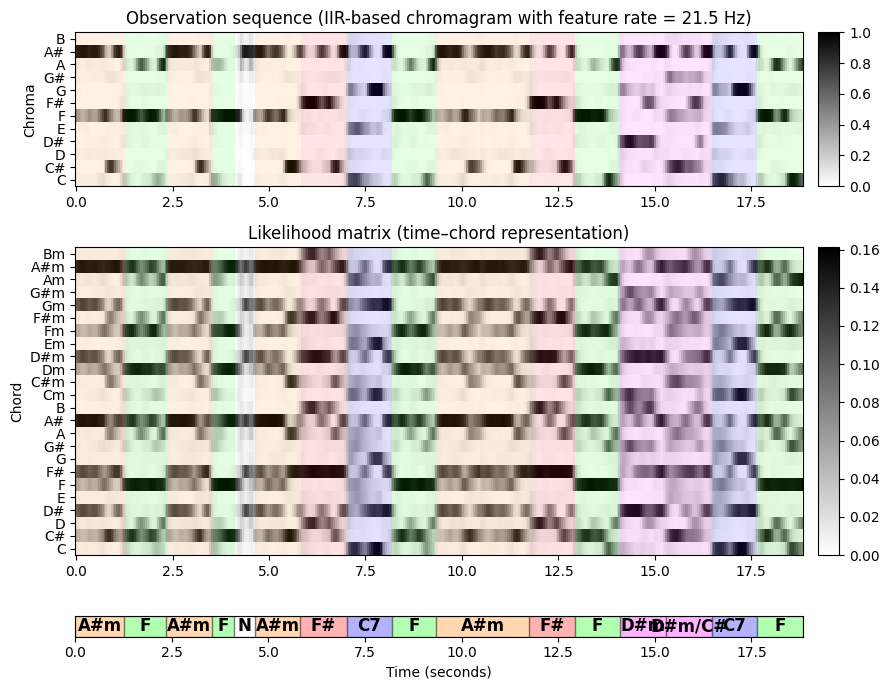

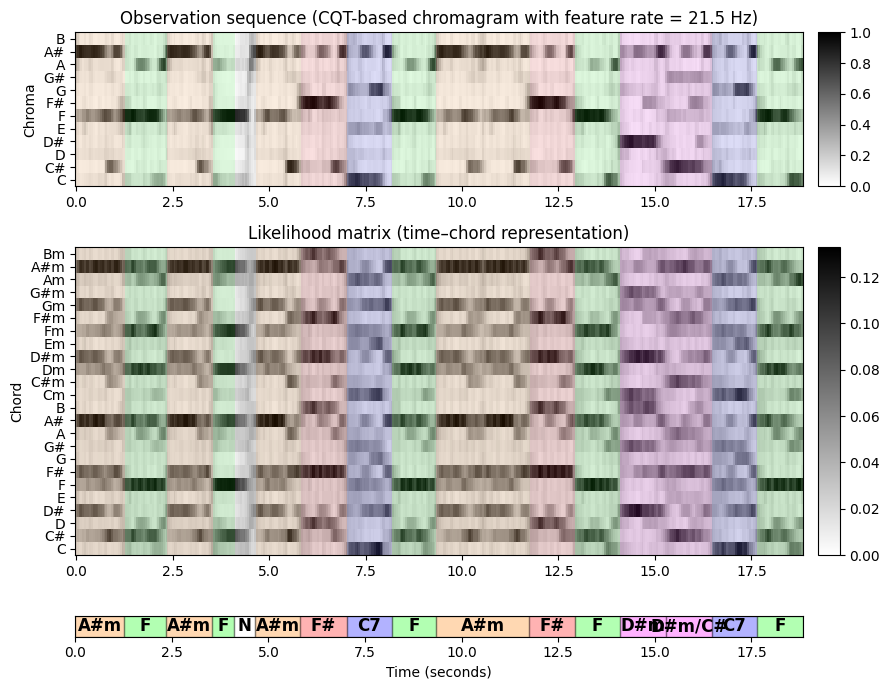

In [7]:
fn_wav = '../Data/Carol Pita - Um Cafune E Um Violao - p2.wav'
fn_ann = '../Data/cafune_labels_p2.csv'
color_ann = {'N': [1, 1, 1, 1], 'A#m': [1, 0.5, 0, 1], 'F': [0, 1, 0, 1], 
             'F#': [1, 0, 0, 1], 'C7': [0, 0, 1, 1], 'D#m': [1, 0, 1, 0], 
             'D#m/C#': [1, 0, 1, 0]}

plot_hmm_likelihood_matrix(fn_wav, fn_ann, color_ann, CHORD_LABELS, version=V_STFT)
plot_hmm_likelihood_matrix(fn_wav, fn_ann, color_ann, CHORD_LABELS, version=V_IIR)
plot_hmm_likelihood_matrix(fn_wav, fn_ann, color_ann, CHORD_LABELS, version=V_CQT)

In [9]:
song_dict = {}
song_dict[0] = ['Cafune P1', 'r', 
                '../Data/Carol Pita - Um Cafune E Um Violao - p1.wav',
                '../Data/cafune_labels_p1.csv']
song_dict[1] = ['Cafune P2', 'b',
                '../Data/Carol Pita - Um Cafune E Um Violao - p2.wav',
                '../Data/cafune_labels_p2.csv']

song_selected = [0, 1]

print('===== Computation of STFT-based chromagrams =====')
X_dict_STFT, Fs_X_dict_STFT, ann_dict_STFT, x_dur_dict, chord_labels = compute_X_dict(song_dict, song_selected, version='STFT')
print('===== Computation of CQT-based chromagrams =====')
X_dict_CQT, Fs_X_dict_CQT, ann_dict_CQT, x_dur_dict, chord_labels = compute_X_dict(song_dict, song_selected, version='CQT')
print('===== Computation of IIR-based chromagrams =====')
X_dict_IIR, Fs_X_dict_IIR, ann_dict_IIR, x_dur_dict, chord_labels = compute_X_dict(song_dict, song_selected, version='IIR')


===== Computation of STFT-based chromagrams =====
Processing:  Cafune P1
Processing:  Cafune P2
===== Computation of CQT-based chromagrams =====
Processing:  Cafune P1
Processing:  Cafune P2
===== Computation of IIR-based chromagrams =====
Processing:  Cafune P1
Processing:  Cafune P2


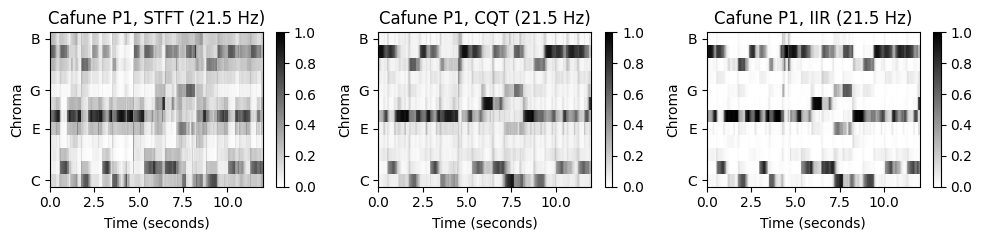

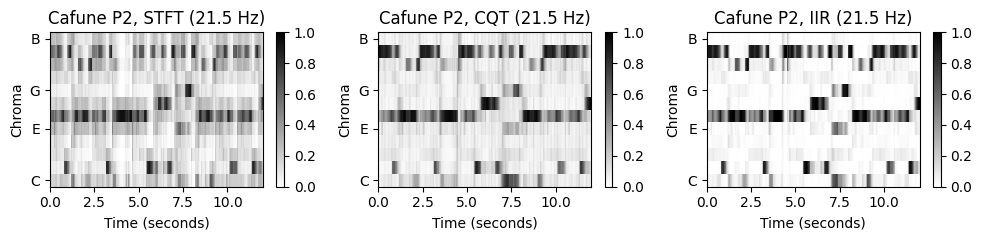

In [10]:
cmap = 'gray_r'
for s in song_selected:
    fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 1, 1], 
                                              'height_ratios': [2]}, figsize=(10, 2.5))
    title = '%s, STFT (%0.1f Hz)' % (song_dict[s][0], Fs_X_dict_STFT[s])
    libfmp.b.plot_chromagram(X_dict_STFT[s], Fs=Fs_X_dict_CQT[s], ax=[ax[0]],  
                             chroma_yticks=[0, 4, 7, 11], clim=[0, 1], cmap=cmap,
                             title=title, ylabel='Chroma', colorbar=True, xlim=[0, 12])
    
    title = '%s, CQT (%0.1f Hz)' % (song_dict[s][0], Fs_X_dict_CQT[s])
    libfmp.b.plot_chromagram(X_dict_CQT[s], Fs=Fs_X_dict_CQT[s], ax=[ax[1]],  
                             chroma_yticks=[0, 4, 7, 11], clim=[0, 1], cmap=cmap,
                             title=title, ylabel='Chroma', colorbar=True, xlim=[0, 12])  

    title = '%s, IIR (%0.1f Hz)' % (song_dict[s][0], Fs_X_dict_IIR[s])
    libfmp.b.plot_chromagram(X_dict_IIR[s], Fs=Fs_X_dict_IIR[s], ax=[ax[2]],  
                             chroma_yticks=[0, 4, 7, 11], clim=[0, 1], cmap=cmap,
                             title=title, ylabel='Chroma', colorbar=True, xlim=[0, 12])      
    plt.tight_layout()

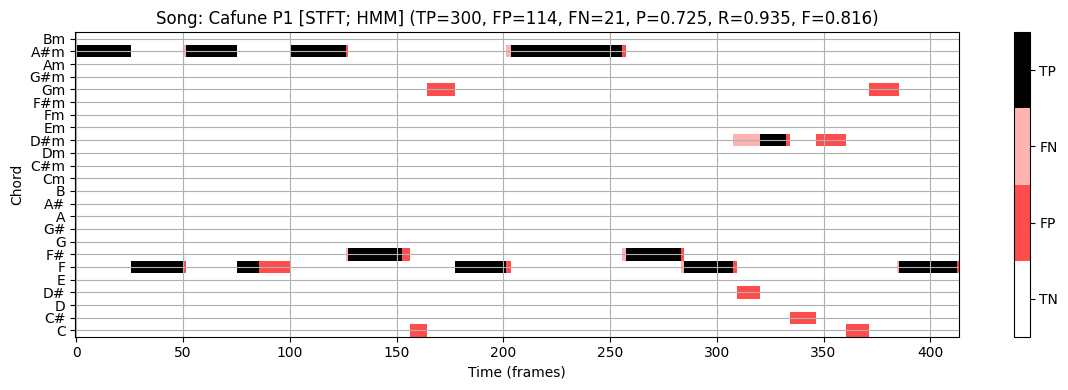

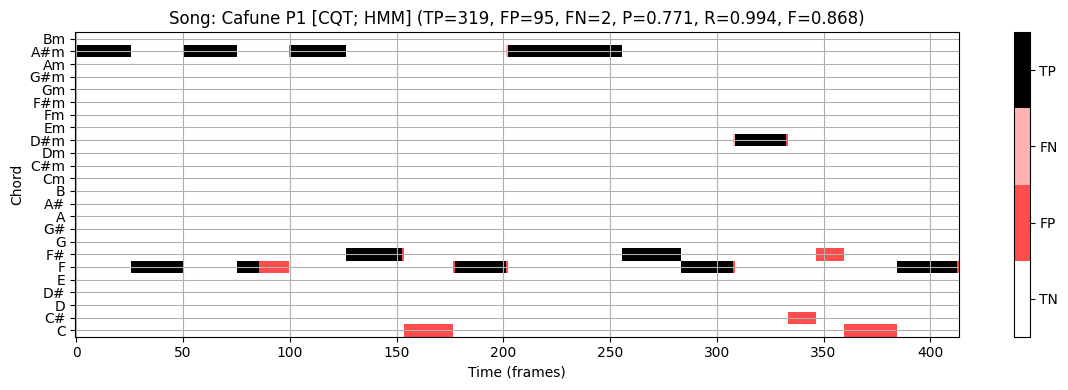

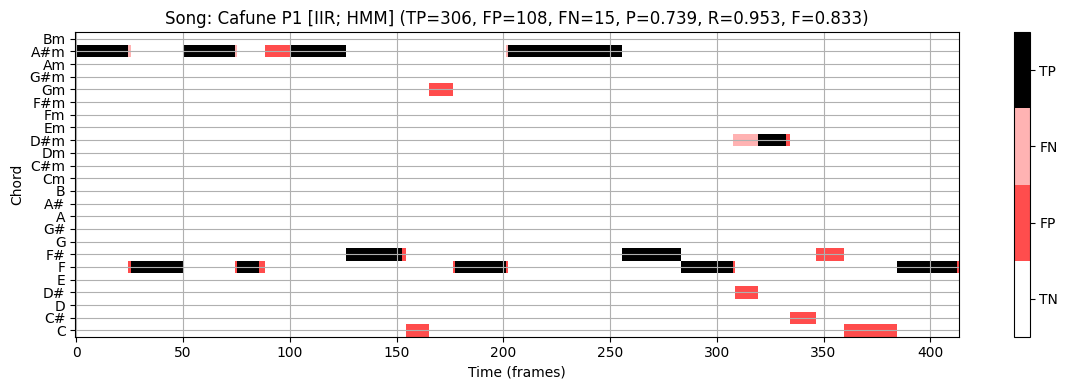

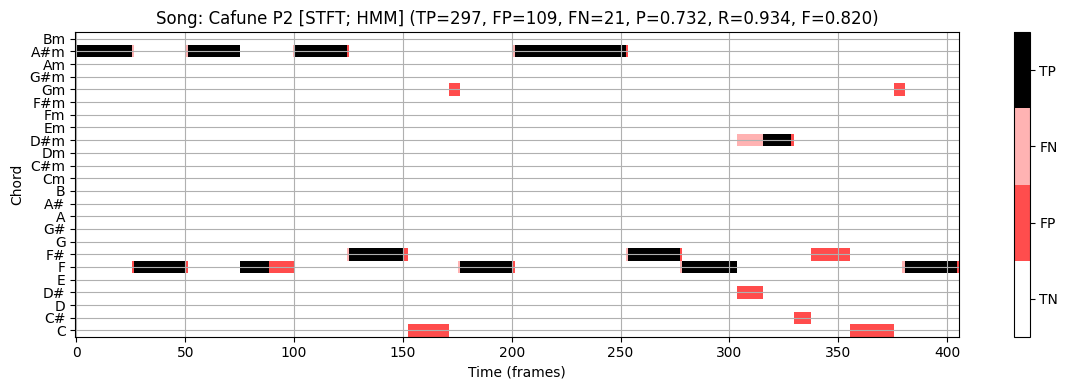

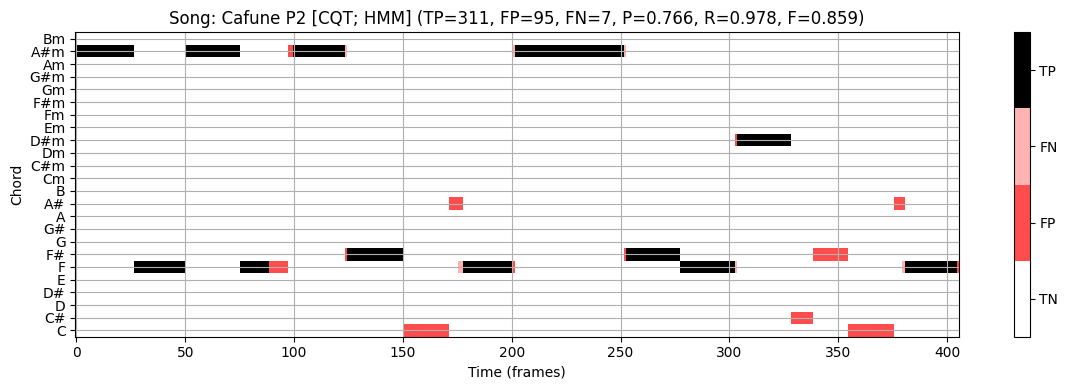

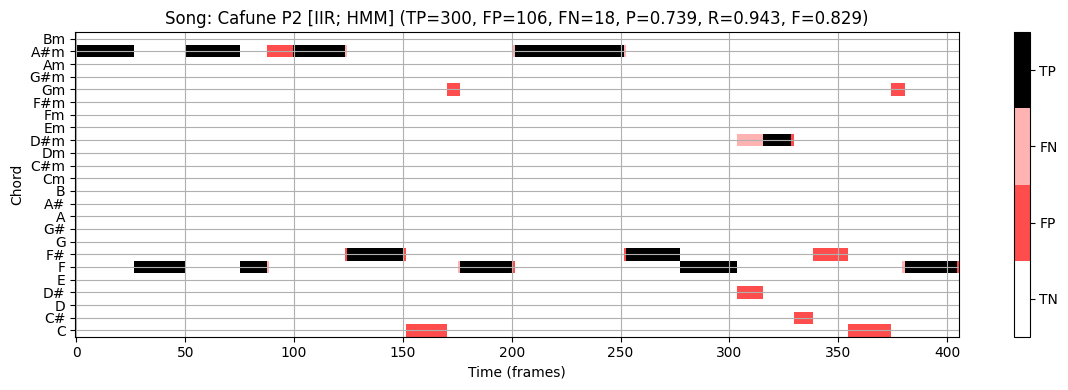

In [12]:
for s in song_selected:
    output = chord_recognition_all(X_dict_STFT[s], ann_dict_STFT[s][0], p=0.15)
    result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
    title = 'Song: %s [STFT; HMM]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_STFT[s][0], result_HMM, chord_HMM, chord_labels, title=title)

    output = chord_recognition_all(X_dict_CQT[s], ann_dict_CQT[s][0], p=0.15)
    result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
    title = 'Song: %s [CQT; HMM]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_CQT[s][0], result_HMM, chord_HMM, chord_labels, title=title)
    
    output = chord_recognition_all(X_dict_IIR[s], ann_dict_IIR[s][0], p=0.15)
    result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
    title = 'Song: %s [IIR; HMM]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_IIR[s][0], result_HMM, chord_HMM, chord_labels, title=title)  